<a href="https://colab.research.google.com/github/rockey1006/Variational-Autoencoders/blob/master/deepface1015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install deepface

     |████████████████████████████████| 61kB 2.9MB/s 
     |████████████████████████████████| 2.3MB 10.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-3.12.2-cp36-none-any.whl size=9694 sha256=f861117eab54995df438ac188e0c58dfebcc3330ec9b0debddff1ef060190ec3
  Stored in directory: /root/.cache/pip/wheels/81/d0/d7/d9983facc6f2775411803e0e2d30ebf98efbf2fc6e57701e09
Successfully built gdown
  Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4


In [3]:
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/facenet_weights.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('/root/.deepface/weights/')

In [6]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/vgg_face_weights.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('/root/.deepface/weights/')

In [7]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/demo3.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('/content/')

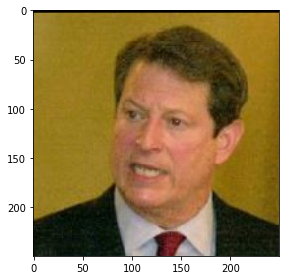

In [8]:
from skimage import data, io

img = io.imread('/content/demo3/Al_Gore_0002.jpg')
io.imshow(img)

io.show()

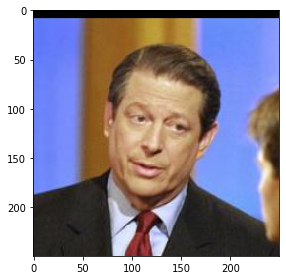

In [9]:
from skimage import data, io

img = io.imread('/content/demo3/Al_Gore_0006.jpg')
io.imshow(img)

io.show()

In [24]:
from deepface import DeepFace
result  = DeepFace.verify("/content/demo3/Al_Gore_0002.jpg", "/content/demo3/Al_Gore_0006.jpg",model_name="Facenet",distance_metric='euclidean_l2')

print("Is verified by facenet: ", result["verified"])
print("euclidean_l2 distance: ",result["distance"])
## for Eucledian < 1.1 is same person


Using Facenet model backend euclidean_l2 distance.
Is verified by facenet:  True
euclidean_l2 distance:  0.75798285


In [23]:
from deepface import DeepFace
result  = DeepFace.verify("/content/demo3/Al_Gore_0002.jpg", "/content/demo3/Al_Gore_0006.jpg",model_name="VGG-Face",distance_metric='euclidean_l2')

print("Is verified by VGG-Face: ", result["verified"])
print("euclidean_l2 distance: ",result["distance"])
# for Eucledian < 1.1 is same person

Using VGG-Face model backend and euclidean_l2 distance.
Is verified by VGG-Face:  True
euclidean_l2 distance:  0.7255833


In [22]:
from deepface import DeepFace
result  = DeepFace.verify("/content/demo3/Al_Gore_0002.jpg", "/content/demo3/Al_Gore_0006.jpg",model_name="Facenet",distance_metric='cosine')

print("Is verified by facenet: ", result["verified"])
print("cosine distance: ",result["distance"])
#for cosine,< 0.4 is same person

Using Facenet model backend cosine distance.
Is verified by facenet:  True
cosine distance:  0.2872689962387085
